#### Dicom file Format ( Digital image and commnuication in medicine ) 
- Use Cases of Dicom Format : <br>
     dicom file stander from defferent types of Medical machine based on the company that desgin arch of machine for
     diagnosis patient and extract the many view of body in 3D 
     the dicom file store Metadata Patient's informations and fives moe stander way to make the commnuity Medicine commuicate even different machine scaner modality is Called **Digital image and commnuication in medicine** 
     <br>   
- Dioom file contain two important sections that store the data of patient 

  1. Header: is the part that keep the patient's information such :<br>
     in the HEADER contianting a series of informatoion wirtten as <br>
     <div class="alert alert-info"><strong> the HEADER </strong> Tag-->part body exminied --> CS:Chest</div> <br>
     
     * Device modality 
     * information patient 
     * serie of study
     * image's information 
 ***all most the time Header may could be private*** <br>
 ***3D slices are store in 2D multi files in dicom in case you also need to combined them at once in Proceesing*** 
  2. body : is the part describe the image shape and slicing view in different dimessions (2D , 3D , 4D ... ext )    
 


In [3]:
import pydicom as dc 
import dicom2nifti 
import matplotlib.pyplot as plt 
from pathlib import Path
import os
from skimage.segmentation import slic
import numpy as np
from tqdm import tqdm
import copy
## Rendering 3D Volume Packages
from vedo import Volume, Text2D
from ipyvtklink.viewer import ViewInteractiveWidget 
from vedo.applications import Slicer3DPlotter , RayCastPlotter , Plotter , IsosurfaceBrowser
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from vedo import *
### here we will use another package help us to reduce code callsed SimpleTik 
from skimage import measure
import nibabel as nib
import nilearn as nl
import nilearn.plotting as nlplt
import SimpleITK as sitk 
plot= Plotter(backend='ipyvtk')


In [4]:
dicom_img = 'data3Dicom/'
path_save = '03-Data-Formats/'
list_path_case =[]

def path_cases(case, path_file):
    # path dicom_img/cases + 'number cases + /dir/dir/dir/IMG + numberIMG 
    cases_path = []
    file_img_path=[]
    list_path_img=[]
    for file_path in os.listdir(path_file):
        list_path_case.append(file_path)
        
    for paths_cases in range(0,len(list_path_case)):
        cases_path.append(os.path.join(dicom_img,list_path_case[paths_cases]))
  
    for full_path_list , subdirs , filename in os.walk(cases_path[case]): 
        file_img_path.append(full_path_list)
        for files_IMG in filename:
            list_path_img.append(os.path.join(full_path_list , files_IMG))
    
                                 
    return list_path_img[2:] , file_img_path[-1]
    
    
img , cases = path_cases(8,dicom_img)
image_size = img[1]
read_file = dc.read_file(image_size)
img_file = read_file.pixel_array
print(f"the number of images in this cases are {len(img)}\n and shape of images are {img_file.shape}")


the number of images in this cases are 337
 and shape of images are (512, 512)


|substructures | Acronym | Anatomical position and functions |
| :- | -: | :-: |
|Left Ventricular cavity | LV | The bottom left portion of the heart below the left atrium for pumping oxygenated blood to all tissues |
|Right Ventricular cavity | RV |The bottom right portion of the heart below the right atrium for pumping oxygen-depleted blood to the lungs |
|Left Atrial cavity | LA | The upper  left portion of the heart to receive oxygenated blood from the four pulmonary veins |
|Right Atrial cavity | RA |The upper right portion of the heart for returning deoxygenated blood from the body to the RV |
|Myocardium of LV | Myo | The myocardium is the muscular middle layer of the wall of the heart for pumping blood around the body |
|Ascending Aorta | AO | The ascending aorta is connected to the heart’s LV to allow the flow of blood from the heart into the aorta |
|Pulmonary Artery | PA | The pulmonary artery begins at the base of the heart’s RV to deliver oxygen-depleted blood to each similar lung |

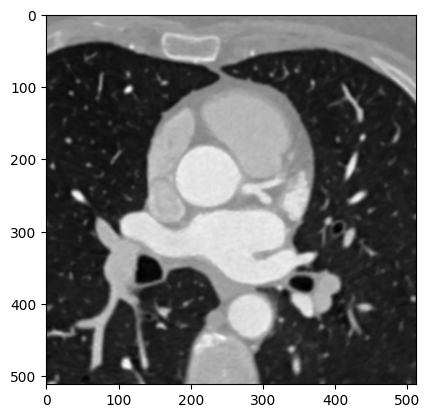

In [3]:
image , _ = path_cases(2,dicom_img)
read_file = dc.read_file(image[2])
img_file = read_file.pixel_array
plt.figure()
plt.imshow(img_file,cmap="gray")

In [4]:
### Projection all the CT image 
all_files_images_of_case ,_ = path_cases(5,dicom_img)
ct_reader_path = []
for path_img in all_files_images_of_case:
    read_img = dc.read_file(path_img)
    ct_reader_path.append(read_img)
    
for slice in ct_reader_path[:5]:
    print(slice.SliceLocation)

138.512
221.312
121.862
260.012
224.912


In [5]:
order_slices = sorted(ct_reader_path,key=lambda slice : slice.SliceLocation)
for slice in order_slices[:5]:
    print(slice.SliceLocation)

98.462
98.912
99.362
99.812
100.262


In [6]:
full_volume_ID = []
for slice in order_slices:
    full_volume_ID.append(slice.pixel_array)

In [7]:
Image_array = np.asarray(full_volume_ID)
print(f"dimession Image is :{Image_array.ndim}\nshape size Image {Image_array.shape}")

dimession Image is :3
shape size Image (443, 512, 512)


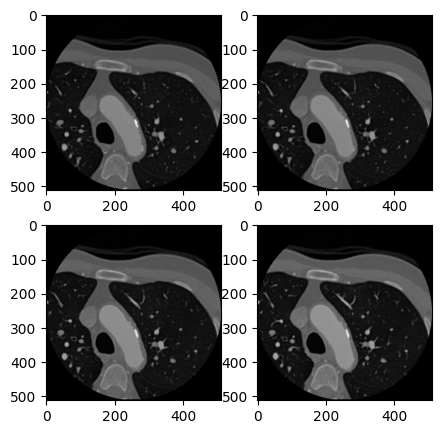

In [8]:
slice_counter = 0
fig , axes = plt.subplots(2,2,figsize=(5,5))
for i in range(2):
    for j in range(2):
        axes[i][j].imshow(Image_array [slice_counter],cmap="gray")
        slice_counter+=1

In [9]:
img , ID_case = path_cases(6,dicom_img)
## Here we will need to convert path String to Path Prefix Object to read by Sitk package
cases_path = Path(cases)

In [10]:
reader= sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(cases))
reader_Filenames= sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(cases),reader[0])
data_Images = sitk.ImageSeriesReader()
data_Images.SetFileNames(reader_Filenames)
data_to_numpy = data_Images.Execute()
### by calling this method automatically istik read all the Slices and return full volume 3D
Array_data = sitk.GetArrayFromImage(data_to_numpy)
print(f" Series IDs of Cases is {reader},\n Sample Dicom file taken is : , {reader_Filenames[0]} \n shape of images {Array_data.shape}")

 Series IDs of Cases is ('1.2.392.200036.9125.200031102200059001.65005695043.1.0.1',),
 Sample Dicom file taken is : , data3Dicom/case70/DATA/ANON2022/20220610/203043/EX1/SE1/IMG337 
 shape of images (337, 512, 512)


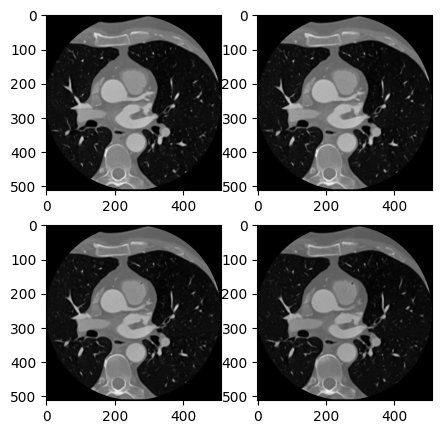

In [11]:
slice_counter = 0
fig , axes = plt.subplots(2,2,figsize=(5,5))
for i in range(2):
    for j in range(2):
        axes[i][j].imshow(Array_data[260:272,: :][slice_counter],cmap="gray")
        slice_counter+=1

In [78]:
def cropImage(Image, corner, dims):
        c = copy.copy(corner)
        for i in range(3):
            if c[i] < 0:
                pad_elem = [(0, 0), (0, 0), (0, 0)]
                pad_elem[i] = (-c[i], dims[i] + c[i] - Image.shape[i])
                pad_elem = tuple(pad_elem)
                I = np.pad(I, pad_elem, 'constant', constant_values=0)
                c[i] = 0

        d, h, w = dims
        z, y, x = c
        return Image[z:z+d, y:y+h, x:x+w]

In [79]:
## this function do same as above just only based on the STIK object 
def Crop_Volume(root_file,center=(),Crop=[],Slice=False): 
    img_sitk  = sitk.ReadImage(root_file, sitk.sitkFloat32)
    # Crop 
    cropImg = sitk.Crop(
      img_sitk,          
      Crop, 
      [img_sitk.GetWidth()-500, img_sitk.GetHeight()-250, img_sitk.GetDepth()-229]) # 上方去除寬度
    img= sitk.GetArrayViewFromImage(img_sitk)
    if Slice == True:  
        img = sitk.GetArrayViewFromImage(img_sitk)
        img = img[center[0]:271, center[1]:300, center[2]:300]
    return img   
    

In [56]:
### this function return Bounding Cude Blocks by loopung through the Slices of image
def get_bound(Arrays): 
    H,W,L = Arrays.shape
    for i in range(0,H):
        if np.max(Arrays[i,:,:])>0:
#            print(np.max(Arrays[i,:,:]))
            H_min = i
            break  
    for i in range(H-200,0,-200):
        if np.max(Arrays[i,:,:])>0:
#            print(np.max(Arrays[i,:,:]))
            H_max = i
            break
    for i in range(0,W):
        if np.max(Arrays[:,i,:])>0:
#            print(np.max(Arrays[:,i,:]))
            W_min = i
            break
    for i in range(W-50,0,-50):
        if np.max(Arrays[:,i,:])>0:
#            print(np.max(Arrays[:,i,:]))
            W_max = i
            break
    for i in range(0,L):
        if np.max(Arrays[:,:,i])>0:
#            print(np.max(Arrays[:,:,i]))
            L_min = i
            break  
    for i in range(L-50,0,-50):
        if np.max(Arrays[:,:,i])>0:
#            print(np.max(Arrays[:,:,i]))
            L_max = i
            break 
    return Arrays[H_min:H_max,W_min:W_max,L_min:L_max]

In [52]:
corner = (2,2,2)
dims = (300,400,512)
Crop_image = cropImage(Array_data,corner,dims)
print(Crop_image.shape)

(300, 400, 510)


In [57]:
New_Bound_Image = get_bound(Crop_image)
New_Bound_Image.shape

(100, 350, 460)

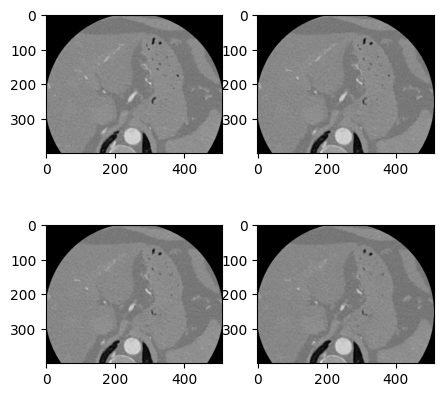

In [53]:
slice_counter = 0
center = (50,50,50)
fig , axes = plt.subplots(2,2,figsize=(5,5))
for i in range(2):
    for j in range(2):
        axes[i][j].imshow(Crop_image[slice_counter],cmap="gray")
        slice_counter+=1

In [61]:
assing_new_image = New_Bound_Image[:, center[1]:300, center[2]:300]
assing_new_image.shape

(100, 250, 250)

In [2]:
def _transform_Image(dcm_dir,ConverintoNIFTI=False,save_dir=None,Crop_Volume=False):
###   from dcm to nii
    ID_serie = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(dcm_dir))
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(str(dcm_dir))
    reader.SetFileNames(dicom_names)
    image2 = reader.Execute()
    
###   transform 3D image to array
    image_array = sitk.GetArrayFromImage(image2)  #  z,y,x
    print(f" Series IDs of Cases is {ID_serie} \n path of case {dicom_names[0]}, \n shape of images {image_array.shape}")

    
###   crop the dark voxel
    if Crop_Volume == True:
        corner = (1,1,1)
        dims = (300,80,512)
        Crop_image = cropImage(Array_data,corner,dims)
        print(Crop_image.shape)
        ###   transform array to 3D image
        new_image= sitk.GetImageFromArray(Crop_image)
        name = save_dir.split('/')[-1] + 'ES1.nii.gz'
        save_path = os.path.join(save_dir,name)
        return sitk.WriteImage(new_image,save_path)
        
###   save 3D image NI file
    if ConverintoNIFTI == True and save_dir is not None:
        try: 
            name = dcm_dir.split('/')[-1] 
            save_path = os.path.join(save_dir,name)   #   get the save path
            ## Convert dicom FIle series into NIFTI format
            tqdm(dicom2nifti.convert_directory(dcm_dir,save_dir))
        except ValueError:
                print("specify the dircotory to save NIFTI file")
            
            

In [111]:
_transform_Image(ID_case,save_dir=path_save,Crop_Volume =True)

 Series IDs of Cases is ('1.2.392.200036.9125.200031102200059001.65005691572.1.0.1',) 
 path of case data3Dicom/case57/DATA/ANON2022/20220610/193252/EX1/SE1/IMG489, 
 shape of images (489, 512, 512)
(300, 400, 511)


In [8]:
def plot_3d(image, threshold=-300): 
    #segments = slic(image, n_segments=100, compactness=10.0, max_iter=10, min_size_factor=0.5, max_size_factor=3)
    p = image.transpose(2,1,0)
    verts, faces, normals, values =measure.marching_cubes(p, threshold, allow_degenerate=True)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [7]:
def Render(volume, Virtualizer=None,function3D=False):
    ## Method based on cude mathching algorithm 
    if function3D == True:
        return plot_3d(volume)
    
    vol = Volume(volume)
    ## Virtualzer options to set 
    if Virtualizer == 'Slicer3D':
        
        
        vol.print_histogram(logscale=1)

        eroded = vol.clone().erode(neighbours=(2,2,2))
        dilatd = vol.clone().dilate(neighbours=(2,2,2))

        plt.show([(vol, __doc__), eroded, dilatd], N=3, viewup='z', zoom=1.4)
        #ViewInteractiveWidget(plt.show().window)
        
    elif Virtualizer == "RayCast":
        plt = RayCastPlotter(vol, bg='black', bg2='blackboard', axes=7)  # Plotter instance

        #plt.show(viewup="z")
        
        #plt = IsosurfaceBrowser(vol, c='black') # Plotter instance

        #plt.show(axes=7, bg2='lb')

        #Can now add any other object to the Plotter scene:
        ViewInteractiveWidget(plt.show(axes=7, bg2='lb').window)
    else:
        raise ValueError("check if the file Volume is corrected shape ")

In [63]:
Render(New_Bound_Image ,"RayCast")

#### NIFTI ( Neuroimaging Informatic Technology intuitive) 
- Use Cases of NIFTI Format : <br>
    is an Open file format for storage of Medical data image 
    isn't Clinacal stander by Hospitals scaner modality is Called <br> **Neuroimaging Informatic Technology intuitive** 
     <br>   
- Dioom file contain two important sections that store the data of patient 

  1. Header: NIFTI file format is different than DICOM Header only contain the informations about Geometry and Volume itself :<br>
     
 ***all most the time Header may could be publice since that isn't Clinical stander uses cases*** <br>
 ***3D slices are store in 2D multi files in nifti combined them at once*** 
  2. body : is the part describe the image shape and slicing view in different dimessions (2D , 3D , 4D ... ext )    
 


In [5]:
loadimage = nib.load(path_save +"ES1.nii.gz")
loadArray = np.asanyarray(loadimage.dataobj)
image_process = loadArray * (loadArray > 10)
print(image_process.shape)
image_f_array = nib.Nifti1Image(image_process,loadimage.affine)

(511, 400, 300)


In [1]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# Smooth intensity values
im_filt = ndi.median_filter(image_process[::,100:120], size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt>60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:',nlabels)

# Create a `labels` overlay
overlay = np.where(labels>0, labels, np.nan)

# Use imshow to plot the overlay
# plt.imshow(overlay, cmap='rainbow', alpha=0.75)
# format_and_render_plot
Render(overlay ,function3D=True)

NameError: name 'image_process' is not defined

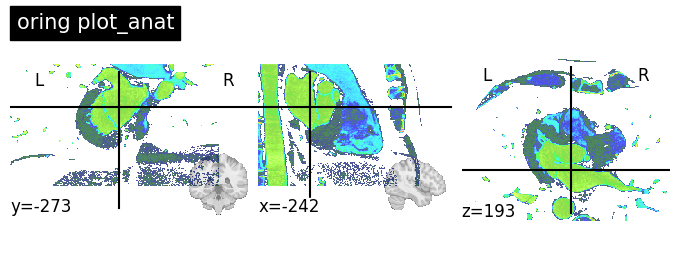

In [161]:
nlplt.plot_roi(image_f_array ,title='oring plot_anat')
plt.show()

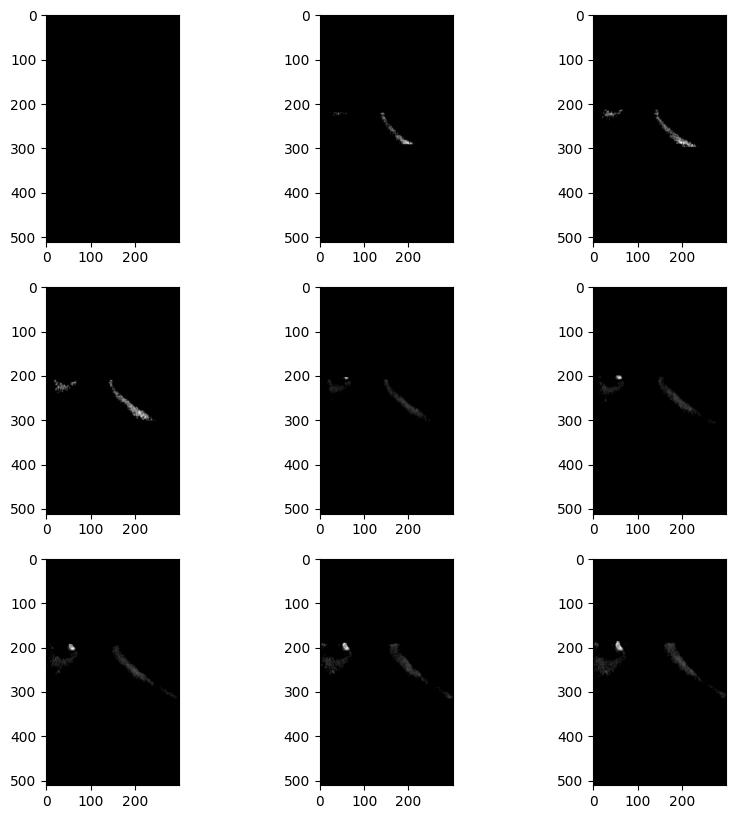

In [162]:
slice_counter = 0 
fig , axes = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(image_process[::,slice_counter],cmap='gray')
        slice_counter +=1